In [19]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate

In [2]:
heart_data = pd.read_csv('statlog.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [4]:
# summary statistics
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [5]:
# check missing values
heart_data.isna().sum()
# no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
presence    0
dtype: int64

In [6]:
heart_data['presence'].value_counts() 

1    150
2    120
Name: presence, dtype: int64

In [7]:
Y = heart_data['presence'].to_numpy()
X = heart_data.drop('presence', axis=1, inplace=False).to_numpy()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
data = (x_train, x_test, y_train, y_test)

In [9]:
print(x_train.shape, x_test.shape)

(216, 13) (54, 13)


In [10]:
def get_best_model_id(scores, metric):
    return np.argmax(scores[metric])
    

## Model 1: Decision Tree Classifier

              precision    recall  f1-score   support

           1       0.84      0.94      0.89        33
           2       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



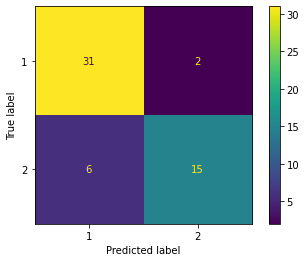

In [82]:
decision_tree = tree.DecisionTreeClassifier(random_state=0)
scoring = ['accuracy', 'precision', 'recall', 'f1']
scores = cross_validate(decision_tree, data_scaler.transform(x_train), y_train, scoring=scoring, return_estimator=True)
model_id = get_best_model_id(scores, 'test_accuracy')
best_model1 = scores['estimator'][model_id]

# testing
y_pred = best_model1.predict(data_scaler.transform(x_test))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=best_model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model1.classes_)
disp.plot()
plt.show()

## Model 2: Logistic Regression

StandardScaler()
              precision    recall  f1-score   support

           1       0.89      0.97      0.93        33
           2       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



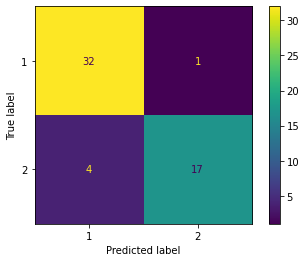

In [83]:
logistic_regressor = LogisticRegression(random_state=0)
scoring = ['accuracy', 'precision', 'recall', 'f1']
data_scaler = StandardScaler()
print(data_scaler.fit(x_train))
x_scaled = data_scaler.transform(x_train)
scores = cross_validate(logistic_regressor, x_scaled, y_train, scoring=scoring, return_estimator=True)

model_id = get_best_model_id(scores, 'test_accuracy')
best_model2 = scores['estimator'][model_id]

# testing
y_pred = best_model2.predict(data_scaler.transform(x_test))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=best_model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model2.classes_)
disp.plot()
plt.show()

## Plotting ROC curves

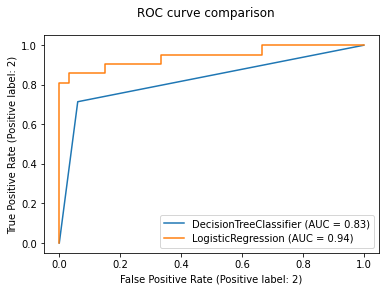

In [84]:
rfc_disp = plot_roc_curve(best_model1, data_scaler.transform(x_test), y_test)
logistic_disp = plot_roc_curve(best_model2, data_scaler.transform(x_test), y_test, ax=rfc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")
plt.show()